<a href="https://colab.research.google.com/github/alefiorante/RadixDesafio/blob/main/ProvaRadix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Perunta 1 do Desafio**
Escolha uma estratégia de tratamento de valores faltantes e outliers e justifique sua escolha.

In [ ]:
import pandas as pd
dados = pd.read_csv('/content/qualidade_do_ar.csv')


In [ ]:
dados.head()

,,,,Date;Time;PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH
10/03/2004;18.00.00;1360;150;11,9;1046;166;1056;113;1692;1268;13,6;48,9;0,7578.0
10/03/2004;19.00.00;1292;112;9,4;955;103;1174;92;1559;972;13,3;47,7;0,7255.0
10/03/2004;20.00.00;1402;88;9;939;131;1140;114;1555;1074;11,9;54;0,7502,NaN,NaN
10/03/2004;21.00.00;1376;80;9,2;948;172;1092;122;1584;1203;11;60;0,7867,NaN,NaN
10/03/2004;22.00.00;1272;51;6,5;836;131;1205;116;1490;1110;11,2;59,6;0,7888.0


In [ ]:
dados2 = dados.dropna()

In [ ]:
dados.shape

(9357, 1)

In [ ]:
dados2.shape

(6519, 1)

Somar dados faltantes no data set

In [ ]:
enulo = dados.isnull()
enulo.head(100)

In [ ]:
faltantes = dados.isnull().sum()


In [ ]:
print(faltantes)

Date;Time;PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH    2838
dtype: int64


Somando percentual de dados faltantes por coluna

In [ ]:
faltantes_percentual = (dados.isnull().sum() / len(dados['Date']))*100

Preenchendo dados faltantes com a média de dados por coluna

In [ ]:
dados['AH'].fillna('Nenhuma',inplace = true)
dados['PT08.S1(CO)'].fillna(dados['PT08.S1(CO)'].mean(),inplace = true)
dados['NMHC(GT)'].fillna(dados['NMHC(GT)'].mean(),inplace = true)
dados['C6H6(GT)'].fillna(dados['C6H6(GT)'].mean(),inplace = true)
dados.head(100)

In [ ]:
dados.shape

(9357, 1)

In [ ]:
faltantes_percentual = (dados.isnull().sum() / len(dados['Date']))*100
print(falatantes_percentual)


**Resposta da pergunta 1**: è possivel fazer um tratamento de valore faltantes e outliers pela função FILLNA para substituir um valor faltante por uma string ou calculo da Média e Mediana e com a função DROPNA para excluir a linha com o valor faltante.

**Pergunta 2 do Desafio**
2 Para as quartas-feiras, quais os horários de pico na cidade (de maior concentração de CO)?

**Resposta da pergunta 2** Sei que existe a biblioteca Datatime no Python porem não entendi como vou somar ou classificar um valor especifico por dia 'Quarta feira e Hora' então escolhi uma função no SQL para Classificar um Valor por Data e Hora talvez isso responda parte da pergunta. Desculpe.

In [ ]:
USE AdventureWorks2012;  
GO  
SELECT p.FirstName, p.LastName  
    ,DATEDIFF(day, ROW_NUMBER() OVER (ORDER BY   
        a.PostalCode), SYSDATETIME()) AS 'Row Number'  
FROM Sales.SalesPerson s   
    INNER JOIN Person.Person p   
        ON s.BusinessEntityID = p.BusinessEntityID  
    INNER JOIN Person.Address a   
        ON a.AddressID = p.BusinessEntityID  
WHERE TerritoryID IS NOT NULL   
    AND SalesYTD <> 0;  

**Pergunta 3 do Desafio**
3 Quais as variáveis ​​mais correlacionadas com a variável de predição?

In [ ]:
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /usr/local/lib/python3.7/dist-packages (0.11.1)


In [ ]:
import seaborn as sns
import numpy as np

In [ ]:
df = sns.load_dataset('dados')

In [ ]:
dados.shape

(9357, 1)

In [ ]:
dados.corr()

,Date;Time;PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH
Date;Time;PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH,1.0


**Correlação** entre as colunas Com o código .corr() é possivel fazer a correlação das variaveis. com base nos valores numericos de cada coluna

Mapa de calor com o Seaborn

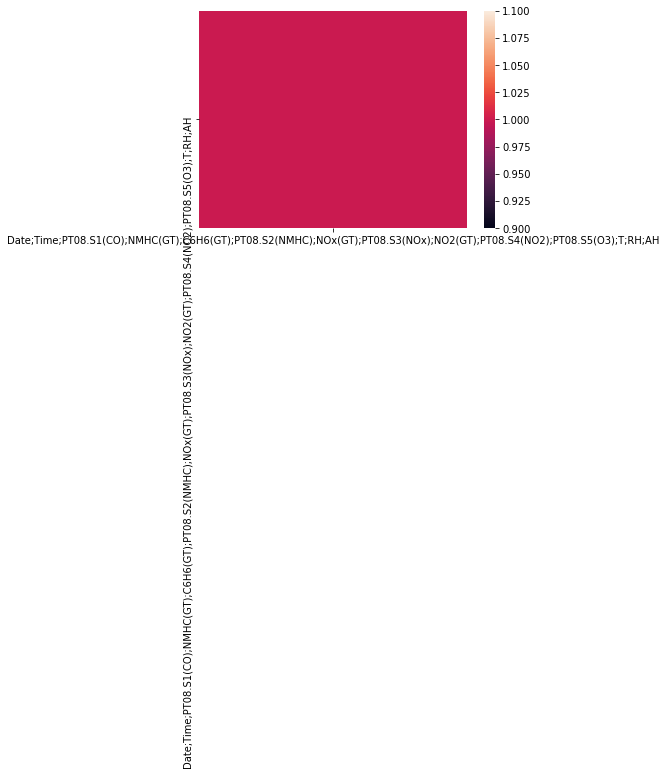

In [ ]:
sns.heatmap(dados.corr())

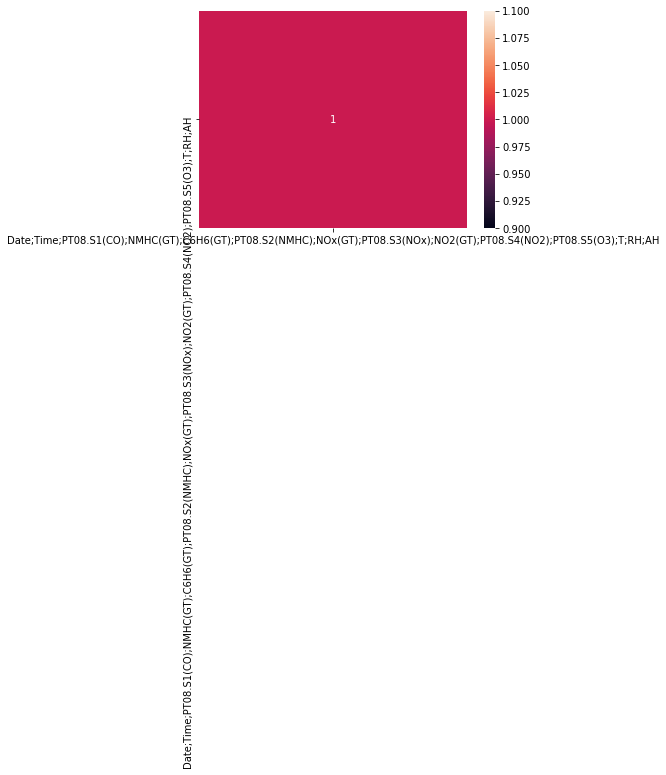

In [ ]:
sns.heatmap(dados.corr(), annot=True)

**Mapa de Valor** Minimo e Maximo

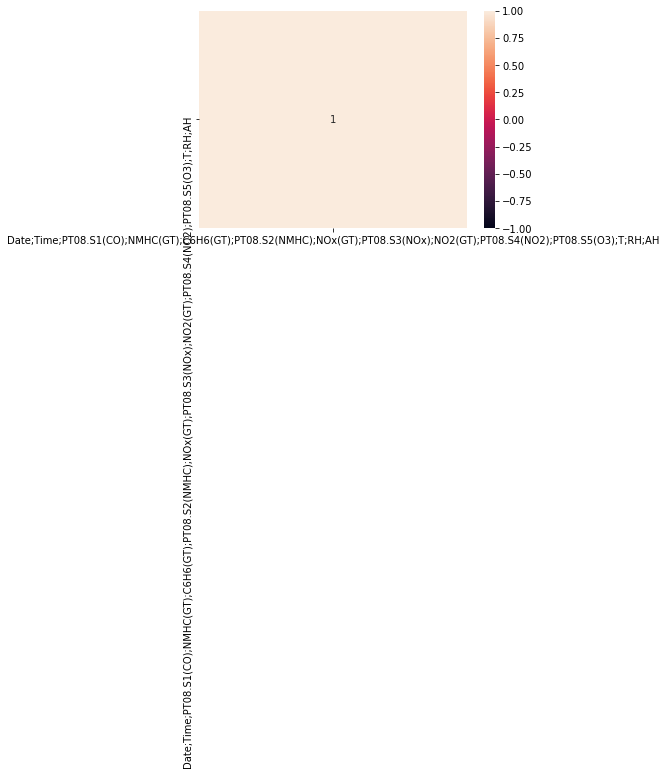

In [ ]:
sns.heatmap(dados.corr(), annot=True, vmin=-1, vmax=1)

**Mapa de calor** frio quente

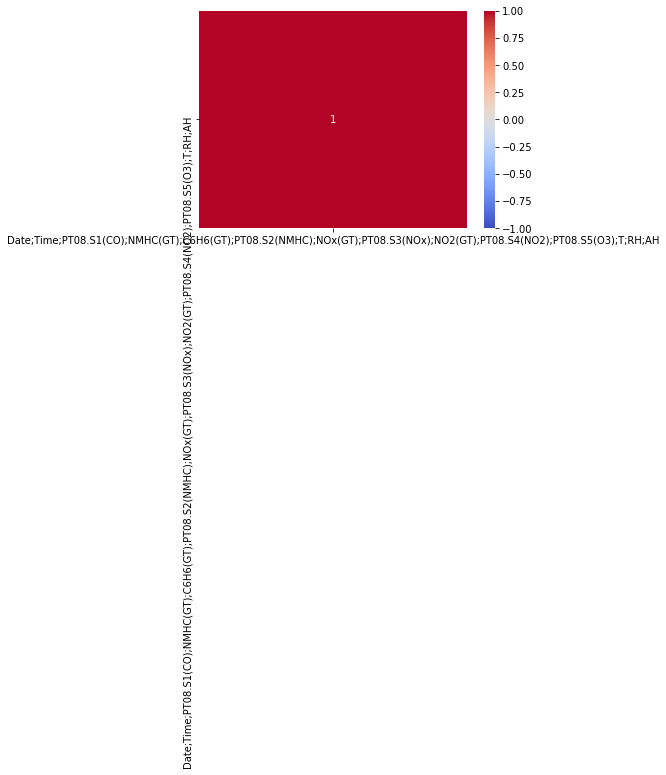

In [ ]:
sns.heatmap(dados.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm')

**Mascara **para ocultar os dados dos triangulo de cima

**Função **.triu para visualizar dados da parte de baixo do mapa

In [ ]:
mask = np.triu(dados.corr())

In [ ]:
mask

array([[1.]])

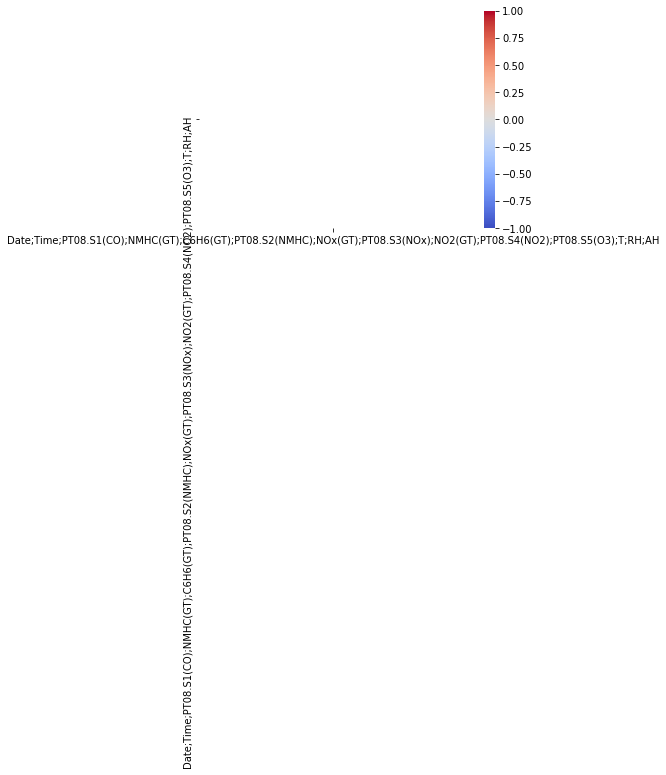

In [ ]:
sns.heatmap(dados.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm',mask=mask)

**Função **.trill para ver os dados pela parte superior do mapa

In [ ]:
mask = np.tril(dados.corr())

In [ ]:
mask

array([[1.]])

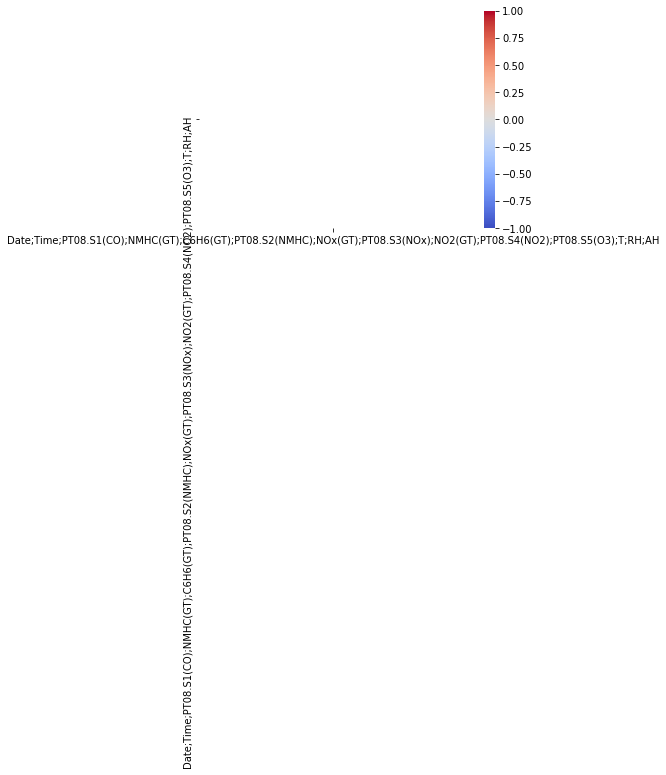

In [ ]:
sns.heatmap(dados.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm',mask=mask)

**Resposta da pergunta 3** ele não funcionou corretamente por causa das colunas e linhas porer o código para realizar outras funções eu coloquei e funcionou no video de referencia sobre como criar Matriz de Correlação

https://www.youtube.com/watch?v=Q3y6gVhRMt4&t=8s

**Pergunta 4 sobre Regressão Linear**
4 Crie um modelo de regressão de PT08.S1 a partir das demais variáveis. Avalie usando como métricas que julgar pertinente para o problema. Resposta

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
dados.head()

,,,,Date;Time;PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH
10/03/2004;18.00.00;1360;150;11,9;1046;166;1056;113;1692;1268;13,6;48,9;0,7578.0
10/03/2004;19.00.00;1292;112;9,4;955;103;1174;92;1559;972;13,3;47,7;0,7255.0
10/03/2004;20.00.00;1402;88;9;939;131;1140;114;1555;1074;11,9;54;0,7502,NaN,NaN
10/03/2004;21.00.00;1376;80;9,2;948;172;1092;122;1584;1203;11;60;0,7867,NaN,NaN
10/03/2004;22.00.00;1272;51;6,5;836;131;1205;116;1490;1110;11,2;59,6;0,7888.0


Aqui não consigo acessar a coluna PT08.S1(CO) para fazer o calculo assim vou colocar x e y 

In [ ]:
X = dados ['X'].values
Y = dados ['Y'].values

In [ ]:
plt.scatter(X,Y,label='Y(X)');
plt.xlabel('X');
plt.ylabel('Y');
plt.legend();

**Y = mX+c**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
modelo = LinearRegression()

In [ ]:
x = x.redshape(-1,1)

In [ ]:
modelo.fit(X,Y)

In [ ]:
acuracia = modelo.score(X,Y)

In [ ]:
print('Acuracia = {0.2f}'.format(Acuracia))

In [ ]:
coef_angular = modelo.coef_(0)

In [ ]:
coef_linear = modelo.intercept_

In [ ]:
print('Coeficiente angular = {0.2f}'.format(coef_angular))

In [ ]:
print('Coeficiente linear = {0.2f}'.format(coef_linear))

In [ ]:
reta = coef_angular*X+coef_linear

In [ ]:
plt.scatter(X,Y,label='Y(X)');
plt.plot(X, reta, label='Ajuste linear',color='red');
plt.xlabel('X');
plt.ylabel('Y');
plt.legend();

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

MAE = mean_absolut_error(Y,reta)
RMSE = np.sqrt(mean_squared_error(Y,reta))

print ('MAE = {0.2f}'.format(MAE))
print ('RMSE = {0.2f}'.format(RMSE))

**Video de referencia para fazer a regressão Linear**
https://www.youtube.com/watch?v=OJdLxvFE0lw

**Pergunta 5 Bonus do Desafio **
5 Como as estações do ano interferem nas variáveis ​​/ predição e qual sua proposta de solução? Essas perguntas servem apenas para direcionar uma análise. Sinta-se livre para surpreender.

**Resposta 5 Bonus Análise de Series Temporais**, 
Séries temporais são uma séries de observações registradas em intervalos de tempo regulares.
Link de referencia:https://sigmoidal.ai/series-temporais-time-series-com-python/

abaixo o codigo explicando como fazer series temporais.

In [ ]:
 ​​# importar pacotes e setar configurações de plots
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns

# url do dataset
dataset_path = "https://raw.githubusercontent.com/carlosfab/escola-data-science/master/datasets/electricity_consumption/Electric_Production.csv"

# importar o csv para um dataframe
df = pd.read_csv(dataset_path)

# ver as 5 primeiras entradas
df.head()

In [ ]:
# plotar gráfico de consumo de eletricidade
plt.plot(df.index, df.Value);

In [ ]:
<em># salvar a decomposicao em result</em>
result = seasonal_decompose(df)

<em># plotar os 4 gr</em>áficos
fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(12,8))
result.observed.plot(ax=ax1)
result.trend.plot(ax=ax2)
result.seasonal.plot(ax=ax3)
result.resid.plot(ax=ax4)
plt.tight_layout()